In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV,  ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import roc_curve, auc  
from numpy import mean, std
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/norma/Desktop/BITIRME/(Mcisiz)GSE_OrtakData_NormR.csv', sep = ";", decimal=",")
print(df.shape)
df = df[df.Class != 2]
df.shape

(1262, 11619)


(949, 11619)

In [3]:
features = df.drop('Class',axis=1)
labels_dr = 'C:/Users/norma/Desktop/BITIRME/gse_less_feature.csv'
labels_df = pd.read_csv(labels_dr, sep = ',')
labels = labels_df.iloc[:949,:2]

### N COMPONENTS = 225

In [4]:
pca = PCA(n_components = 225).fit(features)
principalComponents = pca.fit_transform(features)
columns = ['Pc' + str(i) for i in range(1,226)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, labels, test_size= 0.25, random_state=42)

In [6]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

## List Hyperparameters to tune

In [37]:
n_neighbors = list(range(1,60))
p=[1,2]

optimal_n_neighbors = 0
best_acc = 0
for i in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    if best_acc < knn.score(x_test,y_test):
        best_acc = knn.score(x_test,y_test)
        optimal_n_neighbors = i

print("Optimal N-Neighbors: {}, Accuracy: {}".format(optimal_n_neighbors,best_acc))

optimal_p = 0
best_acc = 0
for i in p:
    knn = KNeighborsClassifier(p = i, )
    knn.fit(x_train, y_train)
    if best_acc < knn.score(x_test,y_test):
        best_acc = knn.score(x_test,y_test)
        optimal_p = i

print("Optimal p: {}, Accuracy: {}".format(optimal_p,best_acc))


Optimal N-Neighbors: 9, Accuracy: 0.6470588235294118
Optimal p: 1, Accuracy: 0.6302521008403361


In [38]:
optimal_weights = 'uniform'
best_acc = 0
weights = ['uniform', 'distance']
for i in weights:
    knn = KNeighborsClassifier(n_neighbors = 17, p = 2, weights = i)
    knn.fit(x_train, y_train)
    if best_acc < knn.score(x_test,y_test):
        best_acc = knn.score(x_test,y_test)
        optimal_weights = i

print("Optimal Weights: {}, Accuracy: {}".format(optimal_weights,best_acc))


Optimal Weights: uniform, Accuracy: 0.6176470588235294


# Optimal K-NN Model

Accuracy: 0.6428571428571429
Classification report : 
               precision    recall  f1-score   support

           1       0.63      0.69      0.66       119
           0       0.66      0.60      0.63       119

   micro avg       0.64      0.64      0.64       238
   macro avg       0.64      0.64      0.64       238
weighted avg       0.64      0.64      0.64       238
 samples avg       0.64      0.64      0.64       238



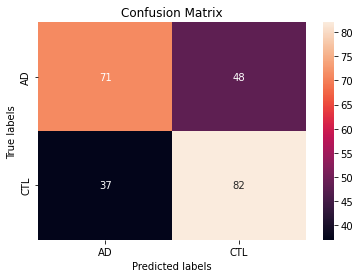

In [7]:
knn = KNeighborsClassifier(n_neighbors = 9, p = 2, weights = 'uniform')
knn.fit(x_train, y_train)
print("Accuracy: {}".format(knn.score(x_test,y_test)))
y_pred = knn.predict(x_test)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

labels = ['AD','CTL']
ax= plt.subplot()

# confusion matrix
matrix = confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [13]:
from sklearn.preprocessing import OneHotEncoder
class_d = 'C:/Users/norma/Desktop/BITIRME/duzgun_GSE_OrtakData_NormR.csv'
class_df = pd.read_csv(class_d, sep = ';', decimal = ',')
class_df = class_df[class_df.Class != 2]

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(class_df[['Class']]).toarray())
encoder_df.columns = ['AD','CTL']

y_test_ = encoder.inverse_transform(y_test).ravel()

In [22]:
labels = labels_df.iloc[:949,:2]

(949, 225)
     AD  CTL
0     1    0
1     1    0
2     1    0
3     1    0
4     1    0
..   ..  ...
944   0    1
945   0    1
946   0    1
947   0    1
948   0    1

[949 rows x 2 columns]


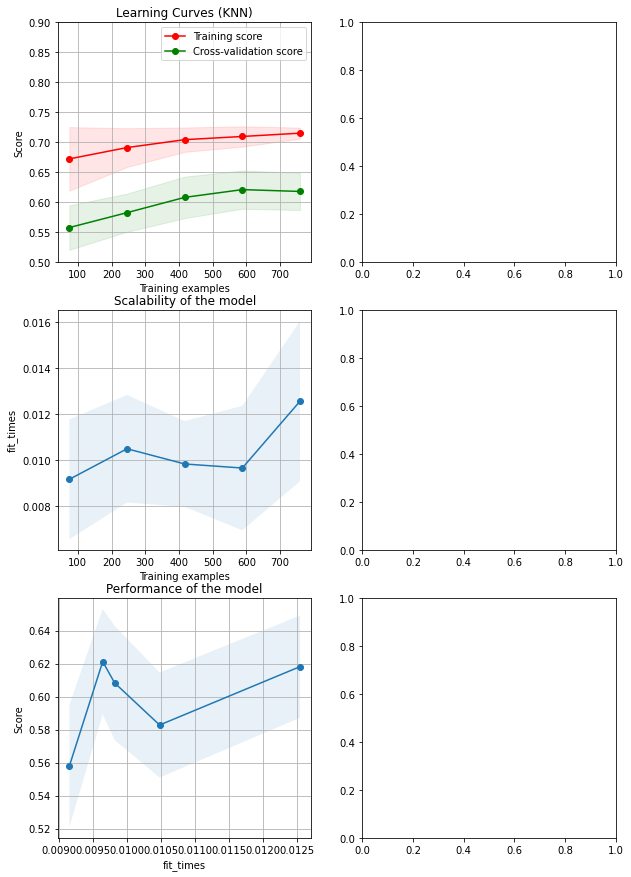

In [27]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (KNN)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = knn
plot_learning_curve(
estimator, title, principalDf, labels, axes=axes[:, 0], ylim=(0.5, 0.9), cv=cv, n_jobs=4
)

plt.show()